In [1]:
### ValDXer testing
import os
os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter
from icecream import ic

settings = Settings(name='test')
settings.replicates = 3
settings.gamma_range = (1,8)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R3'
settings.stride = 1000
# settings.HDXer_stride = 10000

settings.RW_do_reweighting = False
settings.RW_do_params = True
import pickle

VDX = ValDXer(settings)


/home/alexi/Documents/ValDX


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test already exists. Attempting to change

In [2]:
settings.save_figs

True

In [3]:
# import subprocess
# from ValDX.helpful_funcs import conda_to_env_dict

# # Assuming settings.HDXer_env contains the name of your Conda environment
# env_path = conda_to_env_dict(settings.HDXer_env)

# command = "echo $HDXER_PATH"
# print("command:", command)

# # Run the command in the subprocess
# output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# # Capture and print the standard output (stdout)
# hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
# print("HDXER_PATH:", hdxer_path)


In [4]:
def pre_process_main_BPTI():
    # BPTI data
    expt_name = 'Experimental'
    test_name = "MD_Simulated"

    BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
    BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"
    # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"
    expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

    os.listdir(expt_dir)

    segs_name = "BPTI_residue_segs.txt"
    segs_path = os.path.join(expt_dir, segs_name)

    hdx_name = "BPTI_expt_dfracs.dat"
    hdx_path = os.path.join(expt_dir, hdx_name)
    print(hdx_path)

    rates_name = "BPTI_Intrinsic_rates.dat"
    rates_path = os.path.join(expt_dir, rates_name)
    sim_name = 'BPTI_MD'

    sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

    os.listdir(sim_dir)

    md_reps = 1
    rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

    top_name = "bpti_5pti_eq6_protonly.gro"

    top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

    traj_name = "bpti_5pti_reimg_protonly.xtc"

    traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

    print(top_path)
    print(traj_paths)


    small_traj_name = traj_name.replace(".xtc","_small.xtc")
    small_traj_path = os.path.join(sim_dir, small_traj_name)

    u = mda.Universe(top_path, traj_paths)

    
        
    with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
        for ts in u.trajectory[:5]:
                W.write(u.atoms)

    top_path = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/AF_sample_quick/P00974_protonated.pdb"
    traj_paths = ["/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/AF_sample_quick/P00974_protonated.xtc"]

    

    return hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name


In [5]:
hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name = pre_process_main_BPTI()

/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro
['/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc']


(1, 8)
Running benchmark for test
Running r split mode


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_r_naive_random already exists. Attem

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_meth

/home/alexi/Documents/ValDX/data/test_r_naive_random2/train_MD_Simulated_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/test_r_naive_random2/train_MD_Simulated_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/test_r_naive_random2/train_MD_Simulated_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_r_naive_random2/train_MD_Simulated_1/reweighting_gamma_1x10^0/home/alexi/Documents/ValDX/data/test_r_naive_random2/train_MD_Simulated_1/reweighting_gamma_7x10^0/home/alexi/Documents/ValDX/data/test_r_naive_random2/train_MD_Simulated_1/reweighting_gamma_6x10^0/home/alexi/Documents/ValDX/data/test_r_naive_random2/train_MD_Simulated_1/reweighting_gamma_3x10^0






Contacts readContacts readContacts readContacts readContacts read
Contacts read

Contacts read


Hbonds readHbonds read
Hbonds readHbonds read
Hbonds readHbonds read


Segments and experimental dfracs read
Hbonds read
Segments and experimental dfracs read

Segments and experimental dfracs readSegmen

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MD_Simulated_1
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar 

Recalculating val_MD_Simulated_1
    ResStr  ResEnd  peptide                                               path
0        5       6        1  /home/alexi/Documents/ValDX/data/test_r_naive_...
1        6       7        2  /home/alexi/Documents/ValDX/data/test_r_naive_...
2        9      10        3  /home/alexi/Documents/ValDX/data/test_r_naive_...
3       13      14        5  /home/alexi/Documents/ValDX/data/test_r_naive_...
4       16      17        7  /home/alexi/Documents/ValDX/data/test_r_naive_...
5       19      20       10  /home/alexi/Documents/ValDX/data/test_r_naive_...
6       20      21       11  /home/alexi/Documents/ValDX/data/test_r_naive_...
7       23      24       14  /home/alexi/Documents/ValDX/data/test_r_naive_...
8       28      29       18  /home/alexi/Documents/ValDX/data/test_r_naive_...
9       30      31       20  /home/alexi/Documents/ValDX/data/test_r_naive_...
10      31      32       21  /home/alexi/Documents/ValDX/data/test_r_naive_...
11      32      33 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(32,)
[ 9.98272727  9.75681818  6.15909091  6.36363636  5.51        5.63090909
  4.28272727  4.76       12.10363636 16.85545455 13.75636364 13.39090909
  9.08454545 10.22863636  9.56954545 12.09909091  7.57590909 11.08818182
  6.44636364 10.09590909  9.44363636  5.85590909  6.51954545  2.87318182
  6.28409091  7.25454545  7.52181818  8.07863636 13.77       13.22636364
  8.35409091  7.73590909]
LogPf_by_res [ 9.98272727  9.75681818  6.15909091  6.36363636  5.51        5.63090909
  4.28272727  4.76       12.10363636 16.85545455 13.75636364 13.39090909
  9.08454545 10.22863636  9.56954545 12.09909091  7.57590909 11.08818182
  6.44636364 10.09590909  9.44363636  5.85590909  6.51954545  2.87318182
  6.28409091  7.25454545  7.52181818  8.07863636 13.77       13.22636364
  8.35409091  7.73590909]
Pf_by_res [2.16492756e+04 1.72715891e+04 4.72997881e+02 5.80352898e+02
 2.47151127e+02 2.78915562e+02 7.24377283e+01 1.16745926e+02
 1.80527132e+05 2.09040723e+07 9.42568275e+05 6.

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(48,)
[ 4.96363636  9.98272727  9.75681818  6.15909091  6.36363636  4.85863636
  5.91818182  5.51        3.63590909  5.63090909  4.28272727  8.99318182
  4.76       12.10363636 16.85545455 17.35       13.75636364 13.39090909
  5.75272727  2.43409091  5.47090909  9.08454545 10.22863636  9.56954545
 12.09909091  7.57590909 11.08818182  6.44636364 13.15545455 14.75818182
 10.09590909  9.44363636  5.85590909  6.51954545  2.87318182  6.28409091
  7.25454545 11.615       7.52181818  8.07863636  7.11454545  9.25272727
 13.77       13.22636364  8.35409091  7.73590909 12.92818182 12.58681818]
LogPf_by_res [ 4.96363636  9.98272727  9.75681818  6.15909091  6.36363636  4.85863636
  5.91818182  5.51        3.63590909  5.63090909  4.28272727  8.99318182
  4.76       12.10363636 16.85545455 17.35       13.75636364 13.39090909
  5.75272727  2.43409091  5.47090909  9.08454545 10.22863636  9.56954545
 12.09909091  7.57590909 11.08818182  6.44636364 13.15545455 14.75818182
 10.09590909

ic| self.analysis_dump: {'test_r_naive_random': {'BV_constants':      Bc   Bh             calc_name
                        0  0.35  2.0  train_MD_Simulated_1,
                                                 'HDX_data':         0.167       1.0      10.0     120.0  peptide            calc_name  \
                        0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
                        1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
                        2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
                        3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
                        4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
                        ..        ...       ...       ...       ...      ...                  ...   
                        118  0.000797  0.004760  0.046473  0.424724       36  test_MD_Simulated_

plotting R agreement


 [0.09039,
                    0.02665,
                    0.1868,
                    0.82092,
                    1.0,
                    5e-05,
                    0.0,
                    0.00039,
                    0.00158,
                    0.00028,
                    0.61477,
                    0.00033,
                    0.68572,
                    1.0,
                    0.16309,
                    0.99842,
                    0.00111,
                    0.99928,
                    0.00963,
                    0.01757,
                    0.09888]
ic| R_arg_values: [0.02414251911574583,
                   0.10099830909250657,
                   0.10655691508610954,
                   0.8258828028086086,
                   0.8011566945390128,
                   0.09053015010874071,
                   0.00041923361801882164,
                   0.0006297870553264584,
                   0.012557385371663232,
                   0.01784868782336818,
                   0

concat plot_df
plotting nan_df
nan_df


NaN  
            3      NaN     NaN                                                NaN  
            4      NaN     NaN                                                NaN  
            ..     ...     ...                                                ...  
            77    43.0    44.0  /home/alexi/Documents/ValDX/data/test_r_naive_...  
            78    46.0    47.0  /home/alexi/Documents/ValDX/data/test_r_naive_...  
            79    51.0    52.0  /home/alexi/Documents/ValDX/data/test_r_naive_...  
            80    52.0    53.0  /home/alexi/Documents/ValDX/data/test_r_naive_...  
            81    53.0    54.0  /home/alexi/Documents/ValDX/data/test_r_naive_...  
            
            [82 rows x 9 columns]
ic| nan_df:        0.167      1.0     10.0    120.0  peptide             calc_name  \
            0    0.00015  0.00092  0.00916  0.10450       24  train_MD_Simulated_1   
            1    0.00014  0.00083  0.00825  0.09468       13  train_MD_Simulated_1   
            2    

nan_df + expt_df


NaN     NaN  NaN  
            119     NaN     NaN  NaN  
            120     NaN     NaN  NaN  
            121     NaN     NaN  NaN  
            122     NaN     NaN  NaN  
            
            [123 rows x 9 columns]
ic| 'plot_dfracs_compare_MSE'
ic| data:        0.167      1.0     10.0    120.0  peptide             calc_name  \
          0    0.00015  0.00092  0.00916  0.10450       24  train_MD_Simulated_1   
          1    0.00014  0.00083  0.00825  0.09468       13  train_MD_Simulated_1   
          2    0.00766  0.04502  0.36916  0.99603        8  train_MD_Simulated_1   
          3    0.00008  0.00049  0.00488  0.05704       25  train_MD_Simulated_1   
          4    0.54943  0.99155  1.00000  1.00000        4  train_MD_Simulated_1   
          ..       ...      ...      ...      ...      ...                   ...   
          118  0.00963  0.05627  0.43963  0.99904       36          Experimental   
          119  0.01757  0.10068  0.65396  1.00000       37          Experim

plotting MSE for nan_df



          118     NaN     NaN  NaN  
          119     NaN     NaN  NaN  
          120     NaN     NaN  NaN  
          121     NaN     NaN  NaN  
          122     NaN     NaN  NaN  
          
          [123 rows x 9 columns]
ic| expt:        0.167      1.0     10.0    120.0  peptide     calc_name  ResStr  \
          82   0.15669  0.63957  0.99996  1.00000        0  Experimental     NaN   
          83   0.09039  0.43293  0.99656  1.00000        1  Experimental     NaN   
          84   0.02665  0.14933  0.80157  1.00000        2  Experimental     NaN   
          85   0.18680  0.71010  1.00000  1.00000        3  Experimental     NaN   
          86   0.99880  1.00000  1.00000  1.00000        4  Experimental     NaN   
          87   0.82092  0.99997  1.00000  1.00000        5  Experimental     NaN   
          88   0.23198  0.79413  1.00000  1.00000        6  Experimental     NaN   
          89   1.00000  1.00000  1.00000  1.00000        7  Experimental     NaN   
          90  

Finished evaluating HDX
     Bc   Bh             calc_name
0  0.35  2.0  train_MD_Simulated_1
Analysis dumped to results/MD_Simulated/Benchmark/test_r_naive_random/20240301-152724_analysis.csv
dict_keys(['test_r_naive_random'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_r_naive_random to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_r_naive_random to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_r_naive_random to df expt_segs
Key: train_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_r_naive_random to df train_segs
Key: val_segs
<class 'pandas.core.f

/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1397: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["name"] = [name]*len(dump)
/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1398: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["split_type"] = [self.settings.split_mode]*len(dump)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Preparing HDX data for Experimental
Path /home/alexi/Docu

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_meth

/home/alexi/Documents/ValDX/data/test_s_naive_sequential/train_MD_Simulated_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/test_s_naive_sequential/train_MD_Simulated_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/test_s_naive_sequential/train_MD_Simulated_1/reweighting_gamma_6x10^0/home/alexi/Documents/ValDX/data/test_s_naive_sequential/train_MD_Simulated_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_s_naive_sequential/train_MD_Simulated_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_s_naive_sequential/train_MD_Simulated_1/reweighting_gamma_1x10^0





Contacts readContacts readContacts readContacts readContacts read
/home/alexi/Documents/ValDX/data/test_s_naive_sequential/train_MD_Simulated_1/reweighting_gamma_7x10^0



Hbonds readContacts read
Hbonds readHbonds readHbonds read
Hbonds read


Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs readSegments and experimental dfracs rea

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MD_Simulated_1
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar 

Recalculating val_MD_Simulated_1
    ResStr  ResEnd  peptide                                               path
0       31      32       21  /home/alexi/Documents/ValDX/data/test_s_naive_...
1       32      33       22  /home/alexi/Documents/ValDX/data/test_s_naive_...
2       33      34       23  /home/alexi/Documents/ValDX/data/test_s_naive_...
3       34      35       24  /home/alexi/Documents/ValDX/data/test_s_naive_...
4       35      36       25  /home/alexi/Documents/ValDX/data/test_s_naive_...
5       36      37       26  /home/alexi/Documents/ValDX/data/test_s_naive_...
6       37      38       27  /home/alexi/Documents/ValDX/data/test_s_naive_...
7       40      41       28  /home/alexi/Documents/ValDX/data/test_s_naive_...
8       41      42       29  /home/alexi/Documents/ValDX/data/test_s_naive_...
9       42      43       30  /home/alexi/Documents/ValDX/data/test_s_naive_...
10      43      44       31  /home/alexi/Documents/ValDX/data/test_s_naive_...
11      44      45 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar 

LogPf_by_res shape
(24,)
[12.09909091  7.57590909 11.08818182  6.44636364 13.15545455 14.75818182
 10.09590909  9.44363636  5.85590909  6.51954545  2.87318182  6.28409091
  7.25454545 11.615       7.52181818  8.07863636  7.11454545  9.25272727
 13.77       13.22636364  8.35409091  7.73590909 12.92818182 12.58681818]
LogPf_by_res [12.09909091  7.57590909 11.08818182  6.44636364 13.15545455 14.75818182
 10.09590909  9.44363636  5.85590909  6.51954545  2.87318182  6.28409091
  7.25454545 11.615       7.52181818  8.07863636  7.11454545  9.25272727
 13.77       13.22636364  8.35409091  7.73590909 12.92818182 12.58681818]
Pf_by_res [1.79708417e+05 1.95063276e+03 6.53937403e+04 6.30405735e+02
 5.16822385e+05 2.56682894e+06 2.42436278e+04 1.26275519e+04
 3.49292294e+02 6.78270011e+02 1.76932254e+01 5.35976817e+02
 1.41451989e+03 1.10746601e+05 1.84792410e+03 3.22483274e+03
 1.22972452e+03 1.04329805e+04 9.55509514e+05 5.54800371e+05
 4.24752147e+03 2.28908875e+03 4.11754188e+05 2.92675036e+05]

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(48,)
[ 4.96363636  9.98272727  9.75681818  6.15909091  6.36363636  4.85863636
  5.91818182  5.51        3.63590909  5.63090909  4.28272727  8.99318182
  4.76       12.10363636 16.85545455 17.35       13.75636364 13.39090909
  5.75272727  2.43409091  5.47090909  9.08454545 10.22863636  9.56954545
 12.09909091  7.57590909 11.08818182  6.44636364 13.15545455 14.75818182
 10.09590909  9.44363636  5.85590909  6.51954545  2.87318182  6.28409091
  7.25454545 11.615       7.52181818  8.07863636  7.11454545  9.25272727
 13.77       13.22636364  8.35409091  7.73590909 12.92818182 12.58681818]
LogPf_by_res [ 4.96363636  9.98272727  9.75681818  6.15909091  6.36363636  4.85863636
  5.91818182  5.51        3.63590909  5.63090909  4.28272727  8.99318182
  4.76       12.10363636 16.85545455 17.35       13.75636364 13.39090909
  5.75272727  2.43409091  5.47090909  9.08454545 10.22863636  9.56954545
 12.09909091  7.57590909 11.08818182  6.44636364 13.15545455 14.75818182
 10.09590909

ic| self.analysis_dump: {'test_s_naive_sequential': {'BV_constants':      Bc   Bh             calc_name
                        0  0.35  2.0  train_MD_Simulated_1,
                                                     'HDX_data':         0.167       1.0      10.0     120.0  peptide            calc_name  \
                        0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
                        1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
                        2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
                        3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
                        4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
                        ..        ...       ...       ...       ...      ...                  ...   
                        118  0.000797  0.004760  0.046473  0.424724       36  test_MD_Si

plotting R agreement


0.00014
                55    0.00112
                56    0.75420
                57    0.69075
                58    0.02215
                59    0.00297
                60    0.03181
                61    0.00382
                Name: 0.167, dtype: float64
ic| peptides: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                     17, 18, 19, 20])
ic| 'Values to compute R values'
ic| R_expt_values: [0.15669,
                    0.09039,
                    0.02665,
                    0.1868,
                    0.9988,
                    0.82092,
                    0.23198,
                    1.0,
                    0.00028,
                    0.91192,
                    5e-05,
                    0.0,
                    0.0,
                    0.0,
                    0.00039,
                    1.0,
                    0.43718,
                    0.08746,
                    0.00158,
                    0.99999,
                    0.

concat plot_df
plotting nan_df
nan_df
nan_df + expt_df



            119  0.01757  0.10068  0.65396  1.00000       37          Experimental   
            120  0.09888  0.46390  0.99804  1.00000       38          Experimental   
            121  0.00650  0.03831  0.32339  0.99079       39          Experimental   
            122  0.17259  0.67841  0.99999  1.00000       40          Experimental   
            
                 ResStr  ResEnd path  
            0       NaN     NaN  NaN  
            1       NaN     NaN  NaN  
            2       NaN     NaN  NaN  
            3       NaN     NaN  NaN  
            4       NaN     NaN  NaN  
            ..      ...     ...  ...  
            118     NaN     NaN  NaN  
            119     NaN     NaN  NaN  
            120     NaN     NaN  NaN  
            121     NaN     NaN  NaN  
            122     NaN     NaN  NaN  
            
            [123 rows x 9 columns]
ic| 'plot_dfracs_compare_MSE'
ic| data:        0.167      1.0     10.0    120.0  peptide             calc_name  \
          0 

plotting MSE for nan_df


NaN   
          94   0.00000  0.00000  0.00003  0.00037       12  Experimental     NaN   
          95   0.00000  0.00000  0.00003  0.00037       13  Experimental     NaN   
          96   0.00039  0.00232  0.02300  0.24364       14  Experimental     NaN   
          97   1.00000  1.00000  1.00000  1.00000       15  Experimental     NaN   
          98   0.43718  0.96800  1.00000  1.00000       16  Experimental     NaN   
          99   0.08746  0.42191  0.99583  1.00000       17  Experimental     NaN   
          100  0.00158  0.00943  0.09044  0.67940       18  Experimental     NaN   
          101  0.99999  1.00000  1.00000  1.00000       19  Experimental     NaN   
          102  0.00028  0.00166  0.01649  0.18087       20  Experimental     NaN   
          103  0.61477  0.99669  1.00000  1.00000       21  Experimental     NaN   
          104  0.00033  0.00198  0.01966  0.21197       22  Experimental     NaN   
          105  0.68572  0.99902  1.00000  1.00000       23  Experimen

Finished evaluating HDX
     Bc   Bh             calc_name
0  0.35  2.0  train_MD_Simulated_1
Analysis dumped to results/MD_Simulated/Benchmark/test_s_naive_sequential/20240301-152757_analysis.csv
dict_keys(['test_s_naive_sequential'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_s_naive_sequential to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_s_naive_sequential to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_s_naive_sequential to df expt_segs
Key: train_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_s_naive_sequential to df train_segs
Key: val_se

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_meth

/home/alexi/Documents/ValDX/data/test_R3_k_sequence/train_MD_Simulated_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_R3_k_sequence/train_MD_Simulated_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/test_R3_k_sequence/train_MD_Simulated_1/reweighting_gamma_1x10^0/home/alexi/Documents/ValDX/data/test_R3_k_sequence/train_MD_Simulated_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/test_R3_k_sequence/train_MD_Simulated_1/reweighting_gamma_6x10^0/home/alexi/Documents/ValDX/data/test_R3_k_sequence/train_MD_Simulated_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_R3_k_sequence/train_MD_Simulated_1/reweighting_gamma_7x10^0






Contacts readContacts read

Hbonds readHbonds read
Contacts read

Contacts readContacts readHbonds read
Contacts read
Segments and experimental dfracs readSegments and experimental dfracs read
Hbonds read
Hbonds read



Hbonds readSegments and experimental dfracs read
Segments and experimental dfracs read

Segmen

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MD_Simulated_1
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar 

Recalculating val_MD_Simulated_1
    ResStr  ResEnd  peptide                                               path
0        4       5        0  /home/alexi/Documents/ValDX/data/test_R3_k_seq...
1        5       6        1  /home/alexi/Documents/ValDX/data/test_R3_k_seq...
2        6       7        2  /home/alexi/Documents/ValDX/data/test_R3_k_seq...
3        9      10        3  /home/alexi/Documents/ValDX/data/test_R3_k_seq...
4       11      12        4  /home/alexi/Documents/ValDX/data/test_R3_k_seq...
5       13      14        5  /home/alexi/Documents/ValDX/data/test_R3_k_seq...
6       26      27       16  /home/alexi/Documents/ValDX/data/test_R3_k_seq...
7       27      28       17  /home/alexi/Documents/ValDX/data/test_R3_k_seq...
8       28      29       18  /home/alexi/Documents/ValDX/data/test_R3_k_seq...
9       29      30       19  /home/alexi/Documents/ValDX/data/test_R3_k_seq...
10      30      31       20  /home/alexi/Documents/ValDX/data/test_R3_k_seq...
11      31      32 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(21,)
[ 4.96363636  9.98272727  9.75681818  6.15909091  6.36363636  4.85863636
  5.91818182  5.51        2.43409091  5.47090909  9.08454545 10.22863636
  9.56954545 12.09909091  7.57590909 11.08818182  6.44636364 13.15545455
 14.75818182 10.09590909  9.44363636]
LogPf_by_res [ 4.96363636  9.98272727  9.75681818  6.15909091  6.36363636  4.85863636
  5.91818182  5.51        2.43409091  5.47090909  9.08454545 10.22863636
  9.56954545 12.09909091  7.57590909 11.08818182  6.44636364 13.15545455
 14.75818182 10.09590909  9.44363636]
Pf_by_res [1.43113263e+02 2.16492756e+04 1.72715891e+04 4.72997881e+02
 5.80352898e+02 1.28848380e+02 3.71735217e+02 2.47151127e+02
 1.14054454e+01 2.37676164e+02 8.81795669e+03 2.76847324e+04
 1.43219049e+04 1.79708417e+05 1.95063276e+03 6.53937403e+04
 6.30405735e+02 5.16822385e+05 2.56682894e+06 2.42436278e+04
 1.26275519e+04]
kints [ 481.71945087 5161.71683323  961.15665221  606.44884922  391.55626544
 1210.02453405 1874.10610826 2586.98658

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar di

LogPf_by_res shape
(48,)
[ 4.96363636  9.98272727  9.75681818  6.15909091  6.36363636  4.85863636
  5.91818182  5.51        3.63590909  5.63090909  4.28272727  8.99318182
  4.76       12.10363636 16.85545455 17.35       13.75636364 13.39090909
  5.75272727  2.43409091  5.47090909  9.08454545 10.22863636  9.56954545
 12.09909091  7.57590909 11.08818182  6.44636364 13.15545455 14.75818182
 10.09590909  9.44363636  5.85590909  6.51954545  2.87318182  6.28409091
  7.25454545 11.615       7.52181818  8.07863636  7.11454545  9.25272727
 13.77       13.22636364  8.35409091  7.73590909 12.92818182 12.58681818]
LogPf_by_res [ 4.96363636  9.98272727  9.75681818  6.15909091  6.36363636  4.85863636
  5.91818182  5.51        3.63590909  5.63090909  4.28272727  8.99318182
  4.76       12.10363636 16.85545455 17.35       13.75636364 13.39090909
  5.75272727  2.43409091  5.47090909  9.08454545 10.22863636  9.56954545
 12.09909091  7.57590909 11.08818182  6.44636364 13.15545455 14.75818182
 10.09590909

   
                        11  0.00000  0.00000  0.00003  0.00037       11  Experimental     NaN     NaN   
                        12  0.00000  0.00000  0.00003  0.00037       12  Experimental     NaN     NaN   
                        13  0.00000  0.00000  0.00003  0.00037       13  Experimental     NaN     NaN   
                        14  0.00039  0.00232  0.02300  0.24364       14  Experimental     NaN     NaN   
                        15  1.00000  1.00000  1.00000  1.00000       15  Experimental     NaN     NaN   
                        16  0.43718  0.96800  1.00000  1.00000       16  Experimental     NaN     NaN   
                        17  0.08746  0.42191  0.99583  1.00000       17  Experimental     NaN     NaN   
                        18  0.00158  0.00943  0.09044  0.67940       18  Experimental     NaN     NaN   
                        19  0.99999  1.00000  1.00000  1.00000       19  Experimental     NaN     NaN   
                        20  0.00028  0.00166  0.016

plotting R agreement


0.6803627131342919,
                   0.8258828028086086,
                   0.8453762179657696,
                   0.35644907588726843,
                   0.012557385371663232,
                   0.017387582526377676,
                   0.01784868782336818,
                   0.07000962236037311,
                   0.06953731004484887,
                   0.03847918051238225,
                   0.037085472795543195,
                   0.0001227935049696871,
                   0.006030988797364745,
                   0.048080384256988795]
ic| R: 0.393744550360813
ic| 'expt values'
ic| expt_values: [0.63957,
                  0.43293,
                  0.14933,
                  0.7101,
                  1.0,
                  0.99997,
                  0.79413,
                  1.0,
                  0.00165,
                  1.0,
                  0.0003,
                  0.0,
                  0.0,
                  0.0,
                  0.00232,
                  1.0,
          

concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df


0.00003  0.00037       11  Experimental     NaN   
          94   0.00000  0.00000  0.00003  0.00037       12  Experimental     NaN   
          95   0.00000  0.00000  0.00003  0.00037       13  Experimental     NaN   
          96   0.00039  0.00232  0.02300  0.24364       14  Experimental     NaN   
          97   1.00000  1.00000  1.00000  1.00000       15  Experimental     NaN   
          98   0.43718  0.96800  1.00000  1.00000       16  Experimental     NaN   
          99   0.08746  0.42191  0.99583  1.00000       17  Experimental     NaN   
          100  0.00158  0.00943  0.09044  0.67940       18  Experimental     NaN   
          101  0.99999  1.00000  1.00000  1.00000       19  Experimental     NaN   
          102  0.00028  0.00166  0.01649  0.18087       20  Experimental     NaN   
          103  0.61477  0.99669  1.00000  1.00000       21  Experimental     NaN   
          104  0.00033  0.00198  0.01966  0.21197       22  Experimental     NaN   
          105  0.68572  0

Finished evaluating HDX
     Bc   Bh             calc_name
0  0.35  2.0  train_MD_Simulated_1
Analysis dumped to results/MD_Simulated/Benchmark/test_R3_k_sequence/20240301-152810_analysis.csv
dict_keys(['test_R3_k_sequence'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_R3_k_sequence to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_R3_k_sequence to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_R3_k_sequence to df expt_segs
Key: train_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_R3_k_sequence to df train_segs
Key: val_segs
<class 'pandas.core.frame.D

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A

conda run -n HDXER_ENV python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/AF_sample_quick/P00974_protonated.xtc -p /home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/AF_sample_quick/P00974_protonated.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/test_Sp_res_neighbours/train_MD_Simulated_1/calc_hdx_train_MD_Simulated_1.log -out /home/alexi/Documents/ValDX/data/test_Sp_res_neighbours/train_MD_Simulated_1/out__train_MD_Simulated_1 -seg /home/alexi/Documents/ValDX/data/test_Sp_res_neighbours/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt -mopt "{ 'save_detailed' : True }" --times 0.167 1 10 120 -str 1
envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anacon

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_meth

/home/alexi/Documents/ValDX/data/test_Sp_res_neighbours/train_MD_Simulated_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/test_Sp_res_neighbours/train_MD_Simulated_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_Sp_res_neighbours/train_MD_Simulated_1/reweighting_gamma_1x10^0/home/alexi/Documents/ValDX/data/test_Sp_res_neighbours/train_MD_Simulated_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_Sp_res_neighbours/train_MD_Simulated_1/reweighting_gamma_5x10^0




Contacts readContacts readContacts readContacts readContacts read




Hbonds readHbonds readHbonds readHbonds read
Hbonds read



Segments and experimental dfracs readSegments and experimental dfracs read
Segments and experimental dfracs read

Segments and experimental dfracs readSegments and experimental dfracs read

Sum of Output WeightsSum of Output Weights

Sum of Output Weights0.9999999999999999

0.9999999999999999
0.9999999999999999Sum of Output Weights

0.9999999999999999
Sum of

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MD_Simulated_1
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_MD_Simulated_1
    ResStr  ResEnd  peptide                                               path
0        4       5        0  /home/alexi/Documents/ValDX/data/test_Sp_res_n...
1        5       6        1  /home/alexi/Documents/ValDX/data/test_Sp_res_n...
2        6       7        2  /home/alexi/Documents/ValDX/data/test_Sp_res_n...
3        9      10        3  /home/alexi/Documents/ValDX/data/test_Sp_res_n...
4       11      12        4  /home/alexi/Documents/ValDX/data/test_Sp_res_n...
5       18      19        9  /home/alexi/Documents/ValDX/data/test_Sp_res_n...
6       19      20       10  /home/alexi/Documents/ValDX/data/test_Sp_res_n...
7       20      21       11  /home/alexi/Documents/ValDX/data/test_Sp_res_n...
8       21      22       12  /home/alexi/Documents/ValDX/data/test_Sp_res_n...
9       22      23       13  /home/alexi/Documents/ValDX/data/test_Sp_res_n...
10      23      24       14  /home/alexi/Documents/ValDX/data/test_Sp_res_n...
11      24      25 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(24,)
[ 4.96363636  9.98272727  9.75681818  6.15909091  6.36363636  4.85863636
  5.91818182  8.99318182  4.76       12.10363636 16.85545455 17.35
 13.75636364 13.39090909  5.75272727  2.43409091  5.47090909  9.08454545
 10.22863636  9.56954545 12.09909091  7.57590909 11.08818182  6.44636364]
LogPf_by_res [ 4.96363636  9.98272727  9.75681818  6.15909091  6.36363636  4.85863636
  5.91818182  8.99318182  4.76       12.10363636 16.85545455 17.35
 13.75636364 13.39090909  5.75272727  2.43409091  5.47090909  9.08454545
 10.22863636  9.56954545 12.09909091  7.57590909 11.08818182  6.44636364]
Pf_by_res [1.43113263e+02 2.16492756e+04 1.72715891e+04 4.72997881e+02
 5.80352898e+02 1.28848380e+02 3.71735217e+02 8.04802355e+03
 1.16745926e+02 1.80527132e+05 2.09040723e+07 3.42775096e+07
 9.42568275e+05 6.54030386e+05 3.15048713e+02 1.14054454e+01
 2.37676164e+02 8.81795669e+03 2.76847324e+04 1.43219049e+04
 1.79708417e+05 1.95063276e+03 6.53937403e+04 6.30405735e+02]
kints [ 481

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(48,)
[ 4.96363636  9.98272727  9.75681818  6.15909091  6.36363636  4.85863636
  5.91818182  5.51        3.63590909  5.63090909  4.28272727  8.99318182
  4.76       12.10363636 16.85545455 17.35       13.75636364 13.39090909
  5.75272727  2.43409091  5.47090909  9.08454545 10.22863636  9.56954545
 12.09909091  7.57590909 11.08818182  6.44636364 13.15545455 14.75818182
 10.09590909  9.44363636  5.85590909  6.51954545  2.87318182  6.28409091
  7.25454545 11.615       7.52181818  8.07863636  7.11454545  9.25272727
 13.77       13.22636364  8.35409091  7.73590909 12.92818182 12.58681818]
LogPf_by_res [ 4.96363636  9.98272727  9.75681818  6.15909091  6.36363636  4.85863636
  5.91818182  5.51        3.63590909  5.63090909  4.28272727  8.99318182
  4.76       12.10363636 16.85545455 17.35       13.75636364 13.39090909
  5.75272727  2.43409091  5.47090909  9.08454545 10.22863636  9.56954545
 12.09909091  7.57590909 11.08818182  6.44636364 13.15545455 14.75818182
 10.09590909

11  Experimental     NaN     NaN   
                        12  0.00000  0.00000  0.00003  0.00037       12  Experimental     NaN     NaN   
                        13  0.00000  0.00000  0.00003  0.00037       13  Experimental     NaN     NaN   
                        14  0.00039  0.00232  0.02300  0.24364       14  Experimental     NaN     NaN   
                        15  1.00000  1.00000  1.00000  1.00000       15  Experimental     NaN     NaN   
                        16  0.43718  0.96800  1.00000  1.00000       16  Experimental     NaN     NaN   
                        17  0.08746  0.42191  0.99583  1.00000       17  Experimental     NaN     NaN   
                        18  0.00158  0.00943  0.09044  0.67940       18  Experimental     NaN     NaN   
                        19  0.99999  1.00000  1.00000  1.00000       19  Experimental     NaN     NaN   
                        20  0.00028  0.00166  0.01649  0.18087       20  Experimental     NaN     NaN   
                   

plotting R agreement



                    0.00033,
                    0.68572]
ic| R_arg_values: [0.2345182524747435,
                   0.02414251911574583,
                   0.10099830909250657,
                   0.10655691508610954,
                   0.6803627131342919,
                   0.0941614497402059,
                   0.09053015010874071,
                   0.00041923361801882164,
                   6.50357123899159e-06,
                   7.119787960668811e-05,
                   0.0006297870553264584,
                   0.37766133035602073,
                   0.8453762179657696,
                   0.35644907588726843,
                   0.012557385371663232,
                   0.017387582526377676,
                   0.01784868782336818,
                   0.07000962236037311,
                   0.06953731004484887,
                   0.03847918051238225]
ic| R: 0.4018184315139033
ic| 'expt values'
ic| expt_values: [0.63957,
                  0.43293,
                  0.14933,
          

concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df


0.91192  1.00000  1.00000  1.00000        9  Experimental     NaN   
          88   0.00005  0.00030  0.00298  0.03517       10  Experimental     NaN   
          89   0.00000  0.00000  0.00003  0.00037       11  Experimental     NaN   
          90   0.00000  0.00000  0.00003  0.00037       12  Experimental     NaN   
          91   0.00000  0.00000  0.00003  0.00037       13  Experimental     NaN   
          92   0.00039  0.00232  0.02300  0.24364       14  Experimental     NaN   
          93   1.00000  1.00000  1.00000  1.00000       15  Experimental     NaN   
          94   0.43718  0.96800  1.00000  1.00000       16  Experimental     NaN   
          95   0.08746  0.42191  0.99583  1.00000       17  Experimental     NaN   
          96   0.00158  0.00943  0.09044  0.67940       18  Experimental     NaN   
          97   0.99999  1.00000  1.00000  1.00000       19  Experimental     NaN   
          98   0.00028  0.00166  0.01649  0.18087       20  Experimental     NaN   
       

Finished evaluating HDX
     Bc   Bh             calc_name
0  0.35  2.0  train_MD_Simulated_1
Analysis dumped to results/MD_Simulated/Benchmark/test_Sp_res_neighbours/20240301-152823_analysis.csv
dict_keys(['test_Sp_res_neighbours'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_Sp_res_neighbours to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_Sp_res_neighbours to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_Sp_res_neighbours to df expt_segs
Key: train_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_Sp_res_neighbours to df train_segs
Key: val_segs
<cl

ic| 'plotting benchmark BV boxplot by split type'


     Bc   Bh             calc_name                     name split_type  \
0  0.35  2.0  train_MD_Simulated_1      test_r_naive_random          r   
1  0.35  2.0  train_MD_Simulated_1  test_s_naive_sequential          s   
2  0.35  2.0  train_MD_Simulated_1       test_R3_k_sequence         R3   
3  0.35  2.0  train_MD_Simulated_1   test_Sp_res_neighbours         Sp   
4  0.35  2.0  train_MD_Simulated_1      test_r_naive_random          r   
5  0.35  2.0  train_MD_Simulated_1  test_s_naive_sequential          s   
6  0.35  2.0  train_MD_Simulated_1       test_R3_k_sequence         R3   
7  0.35  2.0  train_MD_Simulated_1   test_Sp_res_neighbours         Sp   

                                      name_name     protein dataset     class  
0      test_r_naive_random_train_MD_Simulated_1      random   train   train_r  
1  test_s_naive_sequential_train_MD_Simulated_1  sequential   train   train_s  
2       test_R3_k_sequence_train_MD_Simulated_1    sequence   train  train_R3  
3   test_Sp_r

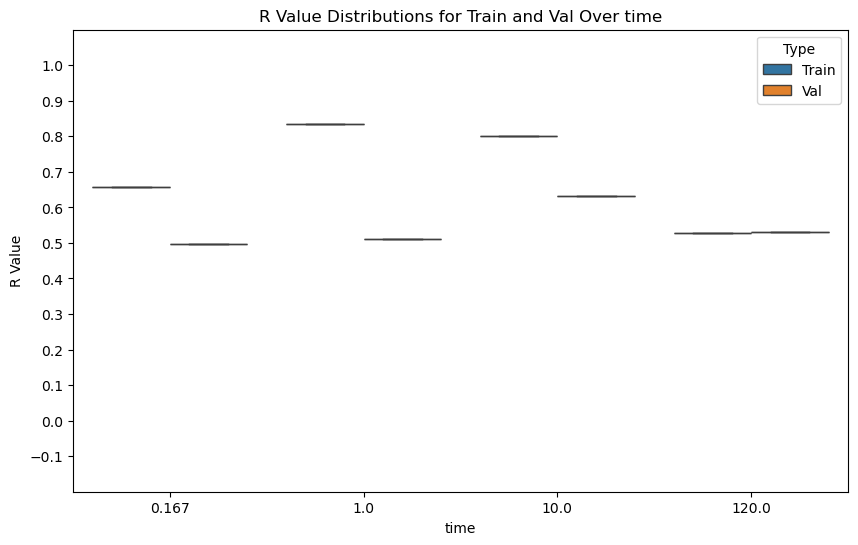

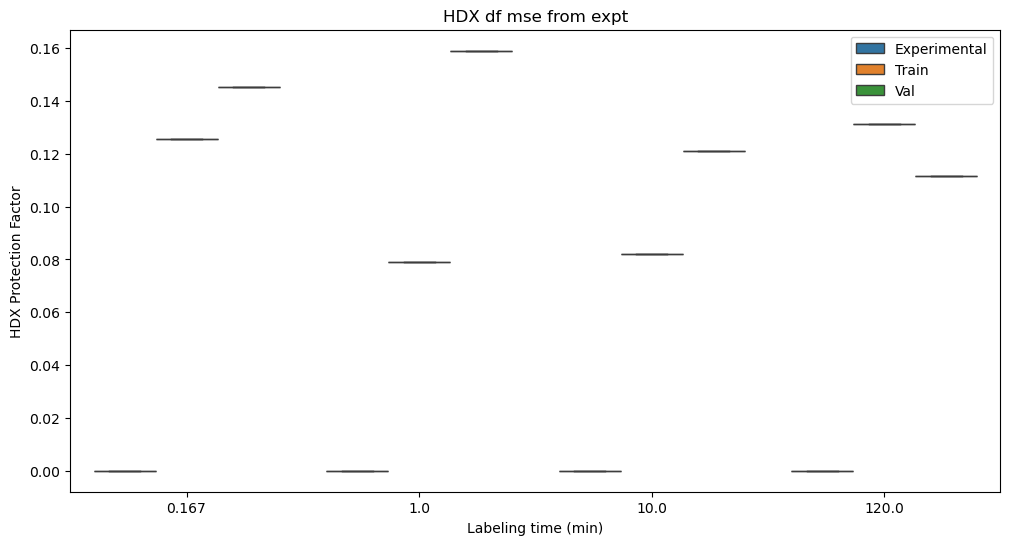

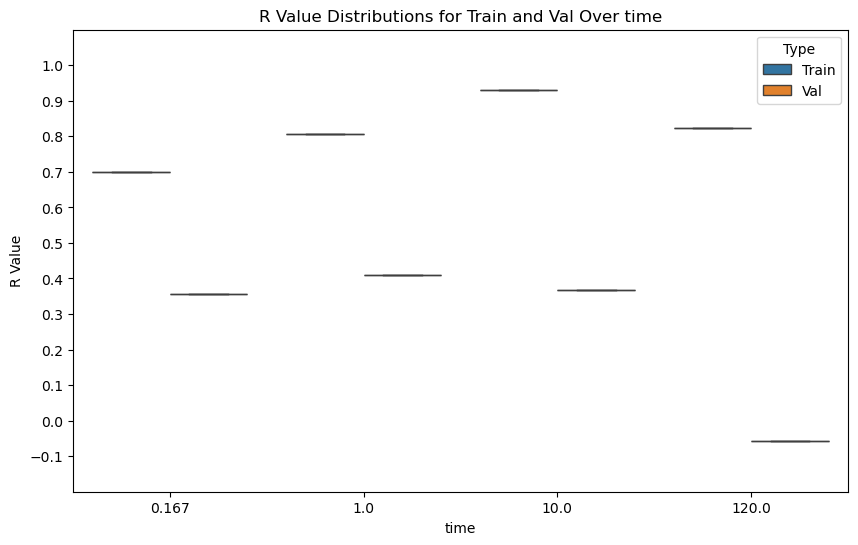

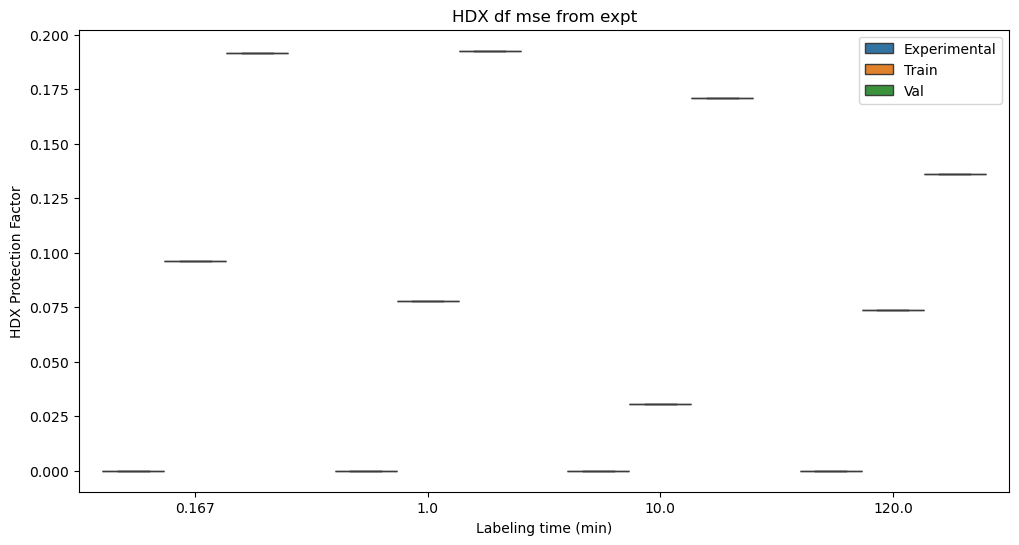

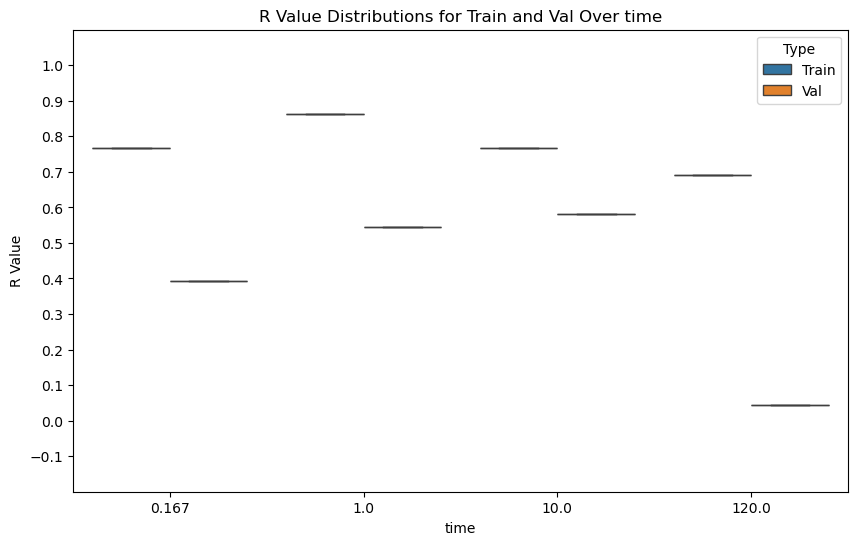

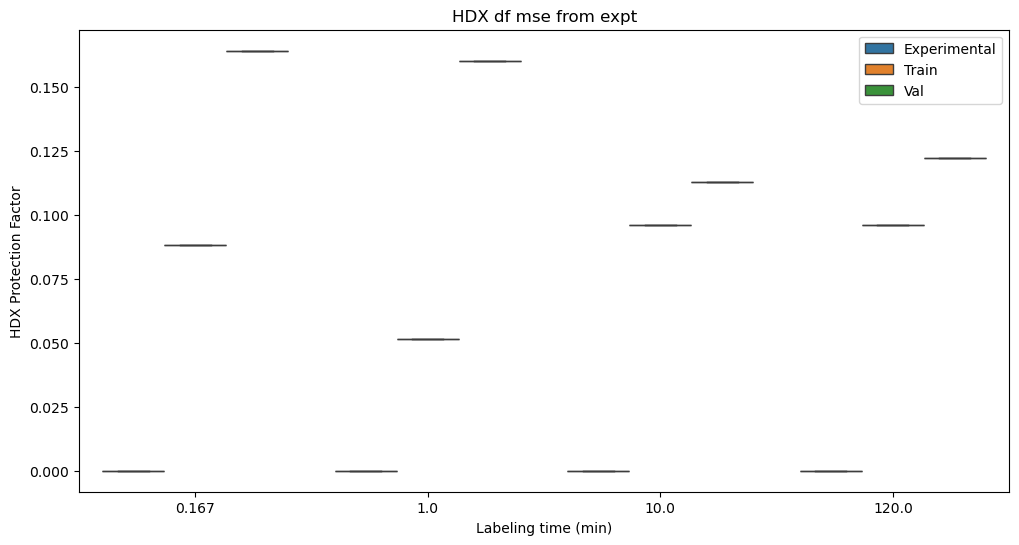

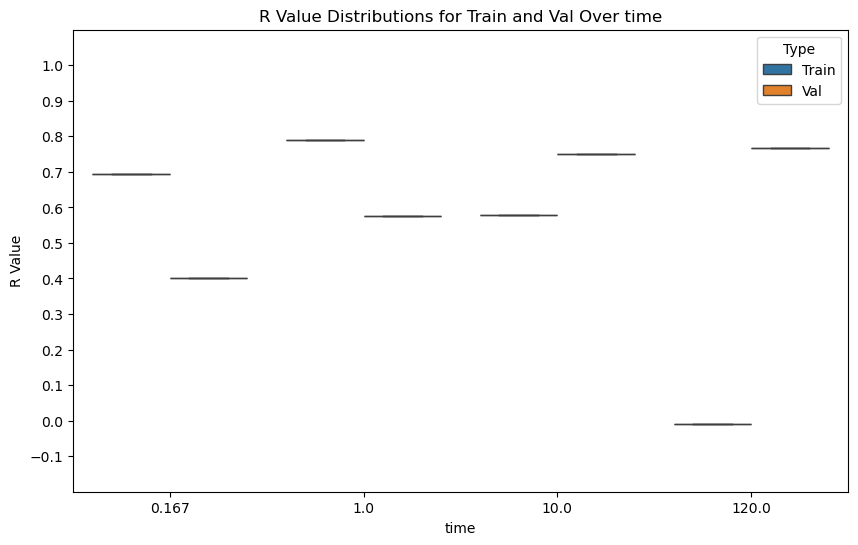

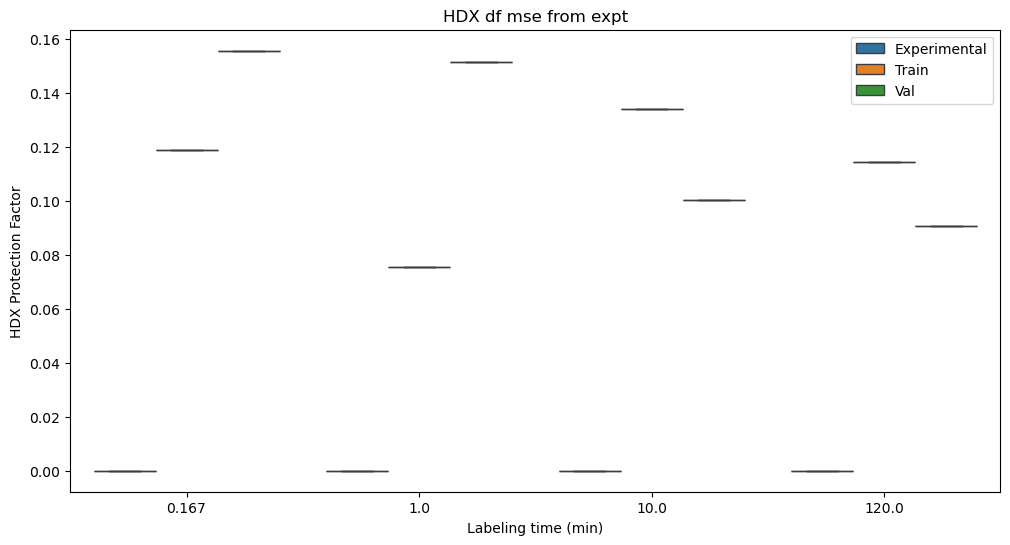

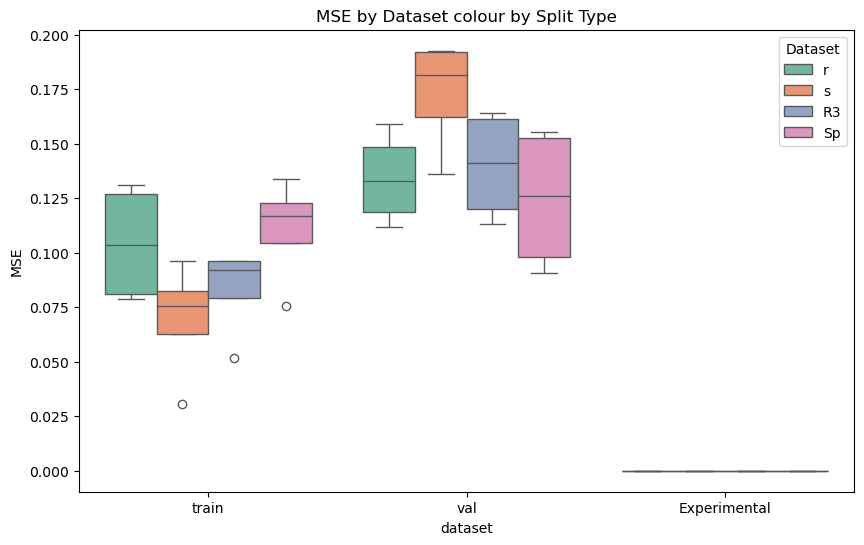

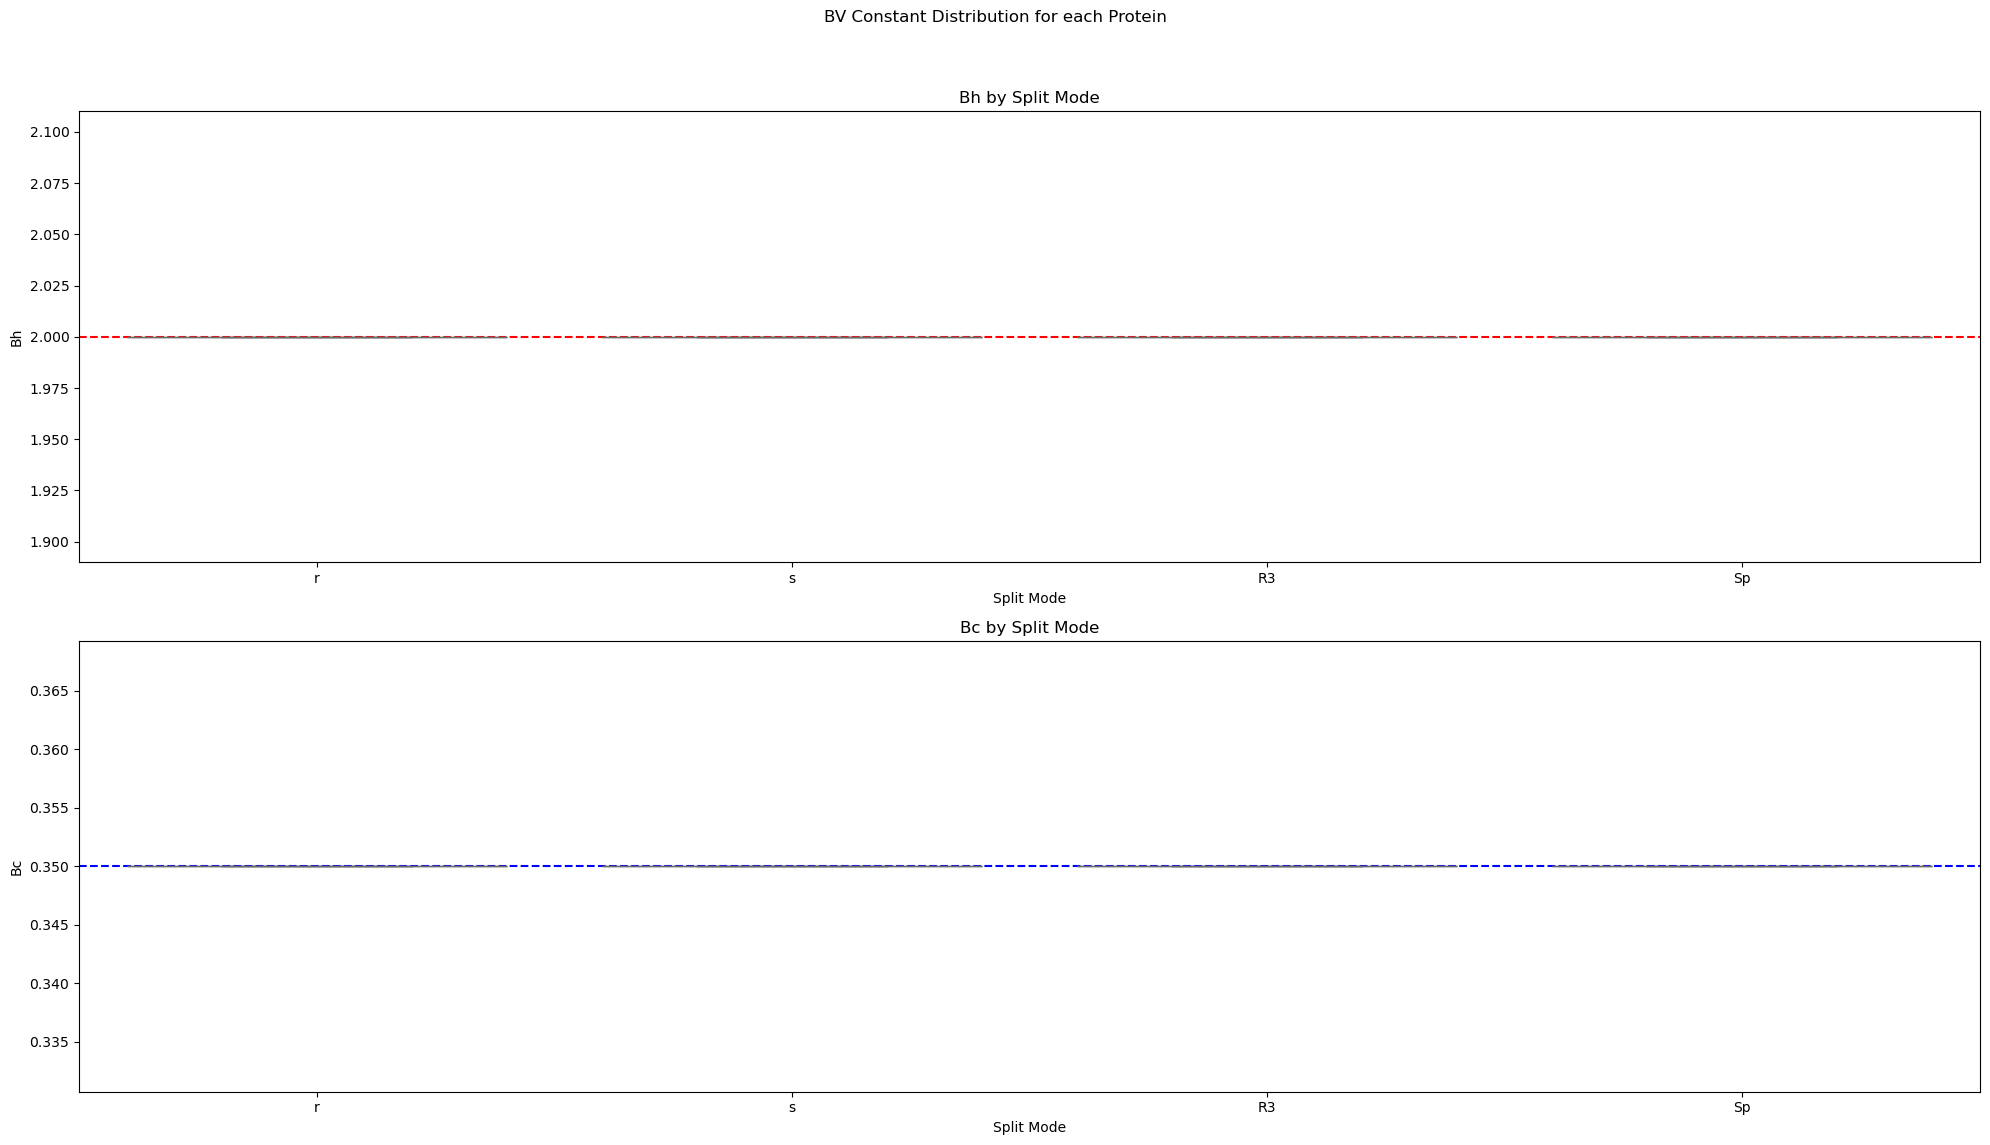

In [8]:
combined_analysis_dump, names, save_paths = VDX.run_benchmark_ensemble(system=test_name,
                                                                        times=[0.167, 1, 10, 120],
                                                                        expt_name=expt_name,
                                                                        n_reps=1,
                                                                        # split_modes=['r'],
                                                                        # RW=True,
                                                                        optimise=False,
                                                                        hdx_path=hdx_path,
                                                                        segs_path=segs_path,
                                                                        traj_paths=traj_paths,
                                                                        top_path=top_path)

                                                                        

In [ ]:
ic.disable()
combined_analysis_dump, names, save_paths = VDX.run_refine_ensemble(system=test_name,
                                                                        times=[0.167, 1, 10, 120],
                                                                        expt_name=expt_name,
                                                                        n_reps=2,
                                                                        split_mode='R3',
                                                                        # RW=True,
                                                                        hdx_path=hdx_path,
                                                                        segs_path=segs_path,
                                                                        traj_paths=traj_paths,
                                                                        top_path=top_path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/AF_sample_quick/P00974_protonated.pdb'

In [ ]:
print(combined_analysis_dump.keys())

analysis_df = combined_analysis_dump['analysis_df']

dict_keys(['expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'HDX_data', 'weights', 'BV_constants', 'LogPfs', 'analysis_df', 'save_paths'])


In [ ]:
# def run_split_test(split_mode, name, system):

#     # settings.split_mode = 'R'
#     settings.split_mode = split_mode
#     settings.name = "_".join([name, split_mode, system])

#     VDX = ValDXer(settings)

#     VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
#     VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

#     VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

#     run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
#     analysis_dump, df, name = VDX.dump_analysis()
#     save_path = VDX.save_experiment()

#     return run_outputs, analysis_dump, df, name, save_path

In [ ]:
# def run_split_test_BPTI(split_mode, name, system):

#     # settings.split_mode = 'R'
#     settings.split_mode = split_mode
#     settings.name = "_".join([name, split_mode, system])

#     VDX = ValDXer(settings)

#     VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
#     VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

#     VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

#     run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
#     analysis_dump, df, name = VDX.dump_analysis()
#     save_path = VDX.save_experiment()

#     return run_outputs, analysis_dump, df, name, save_path


# splits = ['r', 's', 'R3', 'xR', 'Sp', 'SR']
# split_names = ['naiverandom', 'NC_Termini', 'RedundantK', 'XtureK', 'pINspace', 'spaceK']
# system = 'BPTITtut'

# raw_run_outputs = {}
# analysis_dumps = {}
# analysis_df = pd.DataFrame()
# names = []
# save_paths = []


# for split, split_name in zip(splits, split_names):
#     run_outputs, analysis_dump, df, name, save_path = run_split_test_BPTI(split, split_name, system)
#     raw_run_outputs[name] = run_outputs
#     analysis_dumps.update(analysis_dump)
#     analysis_df = pd.concat([analysis_df, df])
#     names.append(name)
#     save_paths.append(save_path)



/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


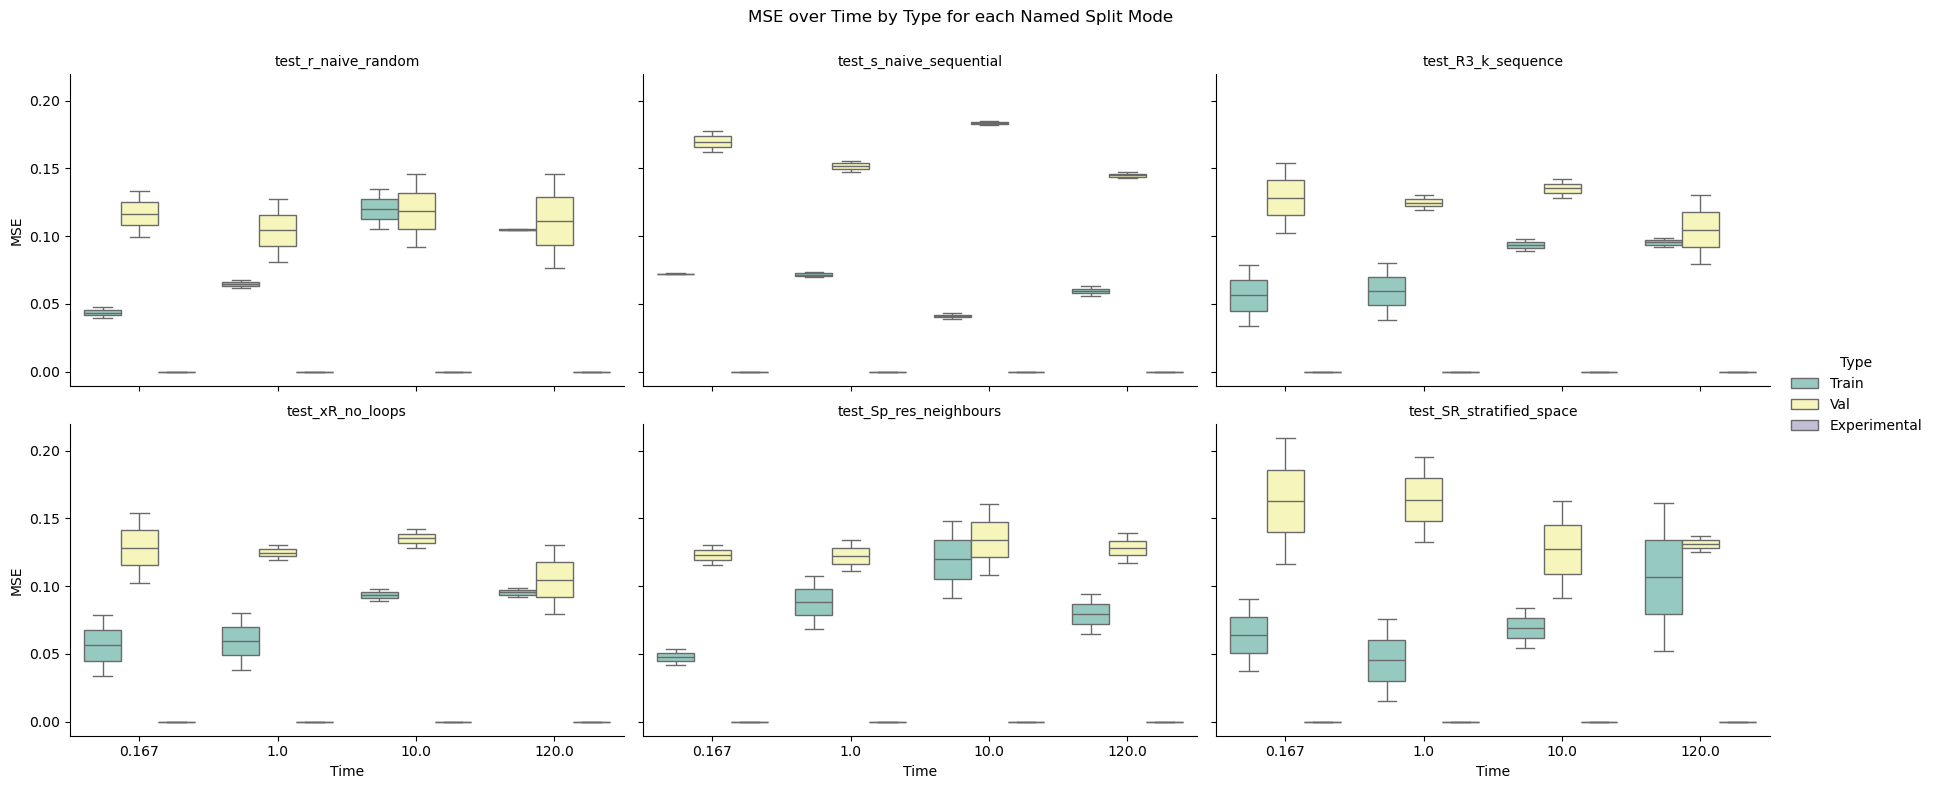

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


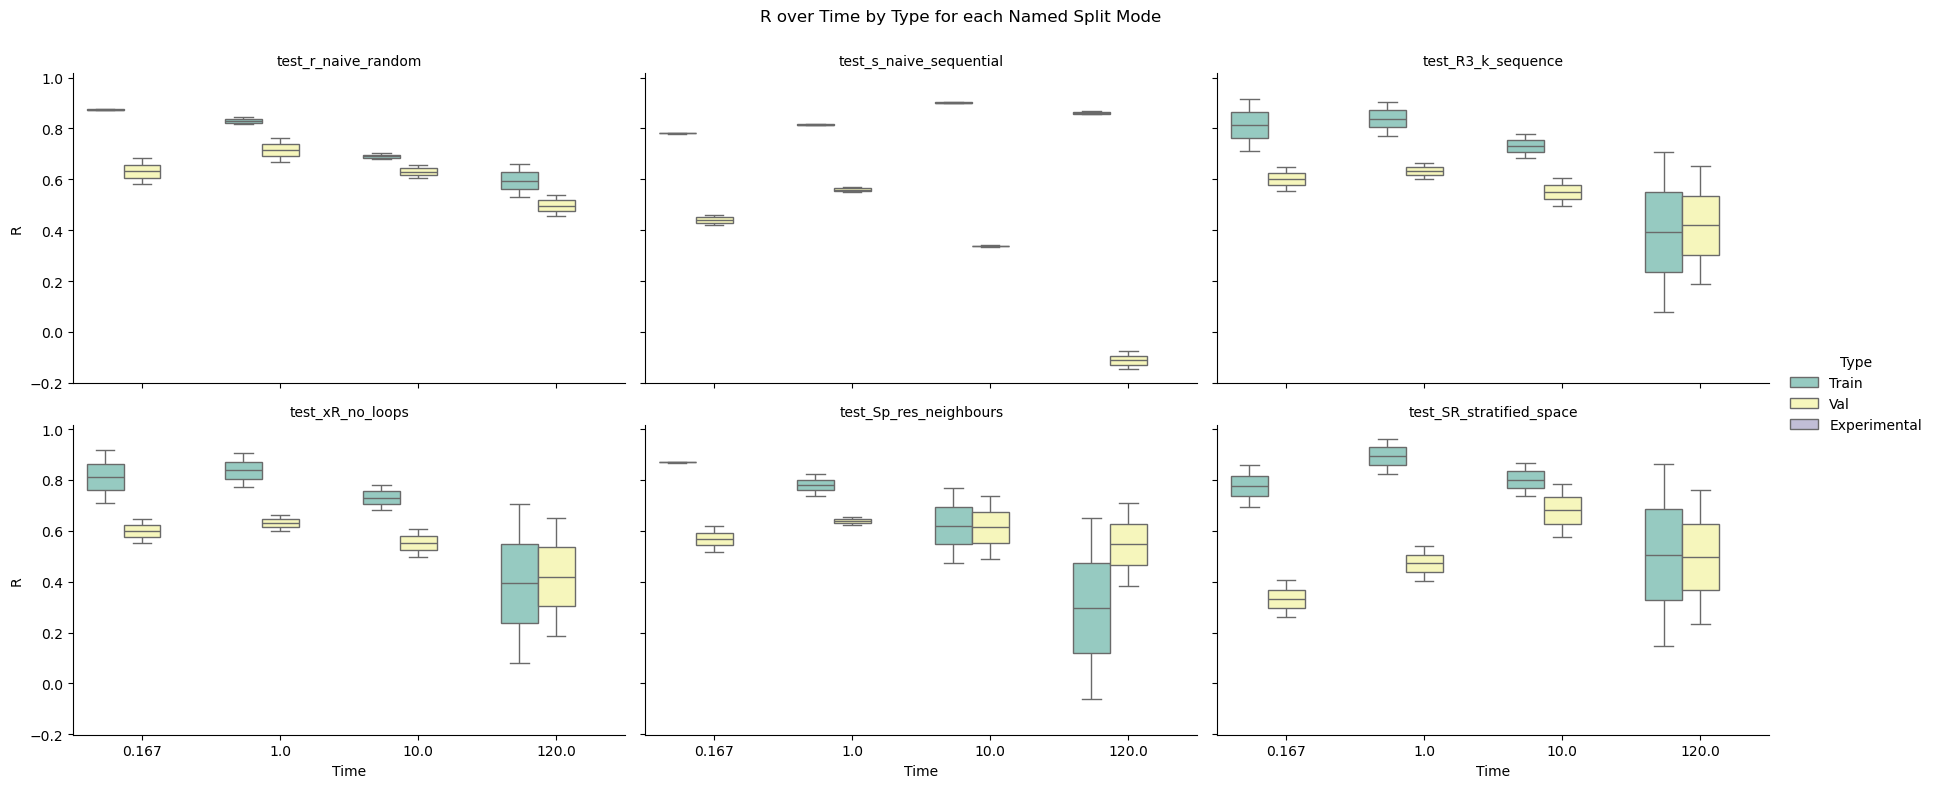

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


NameError: name 'analysis_dumps' is not defined

In [ ]:
# plot BV distributions 
# print(analysis_dumps["AvsB_S"]["BV_constants"])

BV_constants = pd.concat([analysis_dumps[i]["BV_constants"] for i in names])
num_names = len(BV_constants)/len(names)
BV_constants["name"] = [i for i in names for j in range(int(num_names))]
print(BV_constants)

# Create a FacetGrid, using 'name' for each subplot - plot as scatter plot
g = sns.FacetGrid(BV_constants, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('BV Constants over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.scatterplot, "Bc", "Bh", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "BV")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# plot BV distributions 
bc, bh = 0.35, 2

BV_constants = pd.concat([analysis_dumps[i]["BV_constants"] for i in names])
num_names = len(BV_constants)/len(names)
BV_constants["name"] = [i for i in names for j in range(int(num_names))]
print(BV_constants)

# Create a FacetGrid with a single axis
g = sns.FacetGrid(BV_constants, height=4, aspect=1.5)
g.fig.suptitle('BV Constants over Residues for each Named Split Mode')

# Create scatter plot
g = g.map(sns.scatterplot, "Bc", "Bh", "name", palette="Set2", alpha=0.5)

# Adding dashed lines at bc and bh
plt.axhline(bh, color='grey', linestyle='dashed')
plt.axvline(bc, color='grey', linestyle='dashed')

# Adding some additional options for better visualization
g.add_legend(title='name')
g.set_axis_labels("Bc", "Bh")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# print(top_path)

In [ ]:
# pdb_test = mda.Universe(top_path)

# # write out as a pdb and add header
# pdb_test.atoms.write('test.pdb')
# with open('test.pdb', 'r') as original: data = original.read()
# with open('test.pdb', 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)

